TODO:
- get the total durations from data files for normalization
- grid durations should be correlated
- microgrid durations should not be correlated

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import WP19_analysis

In [18]:
def get_durations(messages):
    power_down = messages[messages['message']=='Power Down']
    power_up = messages[messages['message']=='Power Up']

    # first message should be a power down
    assert (power_down.index[0] < power_up.index[0]), 'first message not power down'
    # last message should be a power up
    assert (power_down.index[-1] < power_up.index[-1]), 'last message not power up'
    # should be same number of up and down messages
    assert (len(power_down) == len(power_up)), 'unequal up and down messages'

    return pd.DataFrame(data = {'durations':(power_up.index - power_down.index)/np.timedelta64(1, 'h')}, 
                        index=power_down.index)

def load_message_file(filename):
    return pd.read_csv(filename, index_col=0, parse_dates=True)

def load_timeseries_file(filename):
    return pd.read_csv(filename, index_col=0, parse_dates=True)

def get_total_duration(observations):
    return (observations.index[-1] - observations.index[0])/np.timedelta64(1, 'h')


In [29]:
data = {}
for rfd in WP19_analysis.raw_file_data:
    # get durations from message file
    messages = load_message_file(rfd['village_name'] + '-messages.csv')
    durations = get_durations(messages)
    # get total duration from time series file
    observations = load_timeseries_file(rfd['village_name'] + '.csv')
    total_duration = get_total_duration(observations)
    
    print(rfd['village_name']) 
    data[rfd['village_name']] = {'downtime':durations.sum().values[0],
                                 'total duration':total_duration,
                                 'uptime':1-durations.sum().values[0]/total_duration}
    
pd.DataFrame(data).T

ajau
asei
atamali
ayapo
kensio


,downtime,total duration,uptime
ajau,102.056111,3083.533336,0.966903
asei,101.501389,1888.533332,0.946254
atamali,2003.236389,2977.566668,0.327224
ayapo,2055.485278,3058.383337,0.327918
kensio,2053.530833,2452.666663,0.162735


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1113ed978>]], dtype=object)

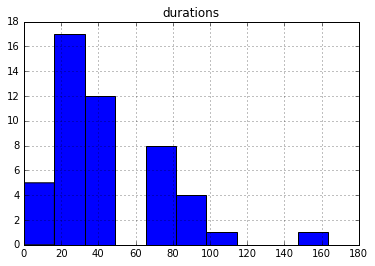

In [15]:
filename = 'kensio-messages.csv'
durations = get_durations(load_message_file(filename))
durations.hist()